In [5]:
# Check for working notebook
print('Im Working')

Im Working


In [6]:
# NLTK imports
import nltk
from nltk.corpus import webtext
from nltk.corpus import state_union
import numpy as np
nltk.download('state_union')
nltk.download('stopwords')
nltk.download('punkt')

print("\n\n")
print('The fields are: ')
print(state_union.fileids())

[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Charx\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Charx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



The fields are: 
['1945-Truman.txt', '1946-Truman.txt', '1947-Truman.txt', '1948-Truman.txt', '1949-Truman.txt', '1950-Truman.txt', '1951-Truman.txt', '1953-Eisenhower.txt', '1954-Eisenhower.txt', '1955-Eisenhower.txt', '1956-Eisenhower.txt', '1957-Eisenhower.txt', '1958-Eisenhower.txt', '1959-Eisenhower.txt', '1960-Eisenhower.txt', '1961-Kennedy.txt', '1962-Kennedy.txt', '1963-Johnson.txt', '1963-Kennedy.txt', '1964-Johnson.txt', '1965-Johnson-1.txt', '1965-Johnson-2.txt', '1966-Johnson.txt', '1967-Johnson.txt', '1

## Stemming
### Using a porter tokenizer
First we are going to be using the Porter tokenizer to compute the word frequencies we are going to be using the 2005 State of the Union speech from GW. Bush


The most common stemmed words are: 
('secur', 32)
('freedom', 21)
('america', 20)
('nation', 19)
('countri', 19)
('govern', 18)
('peopl', 18)
('american', 18)
('social', 18)
('congress', 16)


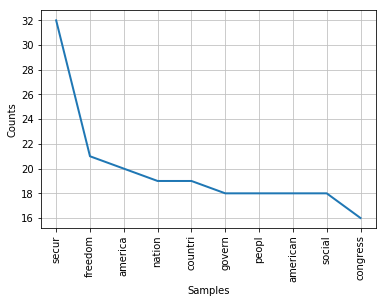

In [7]:
# Porter Stemming
from nltk.stem.porter import *
from nltk import word_tokenize
from nltk.corpus import stopwords 

# Set up the text to tokenize
bushUnion = state_union.raw('2005-GWBush.txt')  

# Define tokenization of the words
words = word_tokenize(bushUnion)

# Create an instance of the porter stemmer
stemmer = PorterStemmer()

# Steam the words
stemmedwords = [stemmer.stem(word) for word in words]

# Frequency distribution of the speech
#words = [word for word in state_union.words(text)]
#frequencies = nltk.FreqDist([w for w in words if len(w) > 4 and w.lower() == w])

# Set-up remove of stop words
stop_words = set(stopwords.words('english')) 

# Cleanup of the stemmed words
cleanedStemmedWords = []
for word in stemmedwords:
    # Not commas periods and applause.
    if word not in [
            ",",
            ".",
            "``",
            "''",
            ";",
            "?",
            "--",
            ")",
            "(",
            ":",
            "!",
            "applaus"
        ] and len(word) > 4 and word not in stop_words:
            cleanedStemmedWords.append(word.lower())
            
# word frequencies of the not steemed document
#frequencies = nltk.FreqDist(stemmedwords)

#for e in frequencies.most_common(10):
#    print (e)
#frequencies.plot(10)

# Perform the frequencies on the cleaned dataset
cleanedFrequencies = nltk.FreqDist(cleanedStemmedWords)
print('The most common stemmed words are: ')
for e in cleanedFrequencies.most_common(10):
    print (e)
cleanedFrequencies.plot(10)


## Zipf's law Verification
Plot the distribution vs the rank on a log-log scale.

Histogram of word frequencies


NameError: name 'special' is not defined

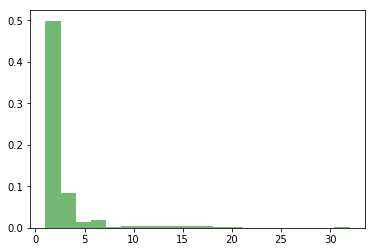

In [8]:
from nltk.probability import DictionaryProbDist
import matplotlib.pyplot as plt


# Using the log transformation
logCleanedFrequencies = DictionaryProbDist(cleanedFrequencies)
logCleanedFrequencies.logprob('secur')


lenght_of_document= len(cleanedStemmedWords)
# Empty object
arrayFormFrequencies = []
for key in cleanedFrequencies:
    arrayFormFrequencies.append(cleanedFrequencies[key]) 

# Log of the frequencies
logArrayFormFrequencies = np.log(arrayFormFrequencies)+1

# Plot of freq
n, bins, patches = plt.hist(arrayFormFrequencies, 20, density=True, facecolor='green', alpha=0.55)
print('Histogram of word frequencies')
plt.figure(1)

# Zipfs law shape parameter
a = 1.5
x = np.arange(1., 20.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y, linewidth=3, color='r')
# Label stuff
red_patch = mpatches.Patch(color='red', label='Zipfs Theoretical pdf')
plt.legend(handles=[red_patch])
plt.xlabel('Frequency')
plt.ylabel('Probabiliy')
plt.title('Histogram')

plt.show()

In [ ]:
# Import for the zipf pmf
from scipy.stats import zipf
from scipy import special
import matplotlib.patches as mpatches

# Log of freq
histogram = plt.hist(logArrayFormFrequencies, 20, density=True, facecolor='green', alpha=0.55)
print('Log transformation of the histogram')

plt.figure(1)

# Zipfs law shape parameter
a = 5
x = np.arange(1., 10.)
y = x**(-a) / special.zetac(a)
plt.plot(x, np.log(y+1), linewidth=3, color='r')
# Label stuff
red_patch = mpatches.Patch(color='red', label='Zipfs Theoretical pdf')
plt.legend(handles=[red_patch])
plt.xlabel('Frequency')
plt.ylabel('Log Probabiliy')
plt.title('Log transformation')

plt.show()


# Document by document check
Now we are goint to repeat the process for term frequencies on all the documents

In [ ]:
from scipy import stats  

def plotFrequencies(document):
    # Tokenization of the words
    words = word_tokenize(document)
    
    # Apply the Porter transformation
    stemmedwords = porterTransform(words)
    
    # Clean up the text
    cleanedWords = cleanUp(stemmedwords)
    
    # Plot the frequencies
    rawPlotFrequencies(cleanedWords)
    
    # Plot histogram
    plotHistogram(cleanedWords)
    
    # Plot Log Histogram
    plotLogHistogram(cleanedWords, 2.2)
    
# Plot Log Histogram
def plotLogHistogram(words, zipfsShape):
    # Get Freq
    cleanedFrequencies = nltk.FreqDist(words)
        
    # Transform into an array form
    arrayFormFrequencies = []
    for key in cleanedFrequencies:
        arrayFormFrequencies.append(cleanedFrequencies[key]) 

    # Log of the frequencies
    logArrayFormFrequencies = np.log(arrayFormFrequencies)+1
    
    # Plot of freq
    histogram = plt.hist(logArrayFormFrequencies, 10, density=True, facecolor='green', alpha=0.55)
    print('Log-Histogram of word frequencies')
    plt.figure(1)

    # Zipfs law shape parameter
    a = zipfsShape
    x = np.arange(1., 10.)
    y = x**(-a) / special.zetac(a)
    plt.plot(x, np.log(y+1), linewidth=3, color='r')
    # Label stuff
    red_patch = mpatches.Patch(color='red', label='Zipfs Theoretical pdf')
    plt.legend(handles=[red_patch])
    plt.xlabel('Frequency')
    plt.ylabel('Log Probabiliy')
    plt.title('Log transformation')

    plt.show()
    
# Plot the histogram
def plotHistogram(words):
    # Get Frequencies
    cleanedFrequencies = nltk.FreqDist(words)

    # Transform into an array form
    arrayFormFrequencies = []
    for key in cleanedFrequencies:
        arrayFormFrequencies.append(cleanedFrequencies[key]) 

    # Plot of freq
    n, bins, patches = plt.hist(arrayFormFrequencies, 20, density=True, facecolor='green', alpha=0.55)
    print('Histogram of word frequencies')
    plt.show()

# Plot the counts
def rawPlotFrequencies(words):
    wordDistribution = nltk.FreqDist(words)
    print('The most common words are: ')
    for e in wordDistribution.most_common(10):
        print (e)
    wordDistribution.plot(10)
    
# The porter Transformation
def porterTransform(words):
    # Create an instance of the porter stemmer
    stemmer = PorterStemmer()

    # Steam the words
    stemmedwords = [stemmer.stem(word) for word in words]
    return stemmedwords

# The clean-up and removal of stop words
def cleanUp(words):
    # Create an empty list of "clean words"
    cleanedStemmedWords = []
    for word in words:
        # Not commas periods and applause.
        if word not in [
                ",",
                ".",
                "``",
                "''",
                ";",
                "?",
                "--",
                ")",
                "(",
                ":",
                "!",
                "applaus"
            ] and len(word) > 4 and word not in stop_words:
                cleanedStemmedWords.append(word.lower())
    # Return the "cleaned dataset"
    return cleanedStemmedWords
    
fileIds = state_union.fileids()
firstDocument = fileIds[0]
# Set up the text to tokenize
currentDocument = state_union.raw(firstDocument)  

plotFrequencies(currentDocument)

In [ ]:
# Now for all the documents
fileIds = state_union.fileids()

for i in range(len(fileIds)):
    
    selectedDocument = fileIds[i - 1]
    # Set up the text to tokenize
    currentDocument = state_union.raw(selectedDocument)  
    # Plot etc.
    print('#######################')
    print('Distributions of the ' + fileIds[i-1] + ' Speech.')
    print('#######################')
    plotFrequencies(currentDocument)




In [ ]:
# Join all the documents together

# Define where are we going to store the corpus
#stateUnion_corpus = []
# Get a list of all the titles of the different documents on the corpus
#texts = state_union.fileids()

# Append them into the stateUnion_corpus
#for i in texts:
#    stateUnion_corpus.append(state_union.raw(i))


In [ ]:
# Import the vectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the Vectorizer
#vectorizer = TfidfVectorizer(min_df=1, stop_words="english",norm=None)
# Fit the state of the union corpus
#X = vectorizer.fit_transform(stateUnion_corpus)

#print (vectorizer.get_feature_names())
# Do the Term Frequency, Document frequency
# @param tf: term frequency
# @param df: document frequency
# @param N: number of documents

#import numpy
#numpy.around(X.toarray(),1)


In [ ]:
#XA = X.toarray()
#for row in XA:
#    n = 18
#    top_n_tfidf = (row.argsort()[-n:][::-1])    
#    for idx in top_n_tfidf:
#        print (vectorizer.get_feature_names()[idx] + "> " + str(row[idx]))
#    print ()
        